In [10]:
#this defaults plots to matplotlib 1.0 formatting
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

# importing packages needed to run this script 
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
from pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser
import sys
sys.path.append('../utilities/')

from graph_helpers import (
   gen_amino_acid_position_in_ref_sequence_graph,
   gen_clustered_similarity_matrix, 
   gen_unclustered_similarity_matrix,
)
from helpers import (
    show_processmsa_results,
    seq_count_check
)

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')  

In [11]:
path2aln_processed = '/home/bjohnson/rdb/data/Insig1pfamalign.txt'
path2out = '../output/'
command =  str('scaProcessMSA -a %s -d %s -i 0' % (path2aln_processed, path2out))
print(command)
call(command,shell = 'True')
print("Executed")

scaProcessMSA -a /home/bjohnson/rdb/data/Insig1pfamalign.txt -d ../output/ -i 0
Loaded alignment of 1392 sequences, 849 positions.
Checking alignment for non-standard amino acids
Aligment size after removing sequences with non-standard amino acids: 1387
Trimming alignment for highly gapped positions (80% or more).
1387
Alignment size post-trimming: 226 positions
Looking for PDBs in home/bjohnson/pySCA-master/data/
using provided reference index 0
A0A672RDX5_SINGR/25-206
here!
len refseq 182, len refpos 226, len algseq 226, len pairalg 226, len gloalg 226
Conducting sequence and position filtering: alignment size is 1387 seqs, 226 pos
ATS should also have 226 positions - ATS: 226
Keeping 975 sequences of 1387 sequences (after filtering for gaps)
Keeping 956 sequences of 975 sequences (after filtering for seq similarity)
After filtering: alignment size is 956 seqs, 199 effective seqs, 177 pos
Final alignment parameters:
Number of sequences: M = 956
Number of effective sequences: M' = 154

In [12]:
dbname = "Insig1pfamalign.db"
pickle_path = '/home/bjohnson/rdb/output/Insig1pfamalign.db'
db = pickle.load(open(pickle_path,'rb'))
Dseq = db['sequence']

In [13]:
show_processmsa_results(Dseq)

*****Final processed alignment parameters****
Number of sequences: M = 956
Number of effective sequences: M' = 154
Number of alignment positions: L = 177
Number of positions in the ats: 177
Number of structure positions mapped: 177
Missing key distmat
****************************************


In [14]:
# check for sufficient sequences in alignment
seq_count_check(Dseq)

The number of effective sequences in this MSA is: 154
This alignment has a sufficient number of effective sequences for analysis with SCA.
Npos (L) = 177


In [15]:
# Apply scaCore to our processed alignment 
command = 'scaCore -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')
db = pickle.load(open(pickle_path,'rb'))
Dsca = db['sca']
print("Executed")

scaCore -i /home/bjohnson/rdb/output/Insig1pfamalign.db
Computing the sequence projections.
Computing sequence similarity matrix.
Computing the SCA conservation and correlation values.
Computing matrix randomizations...
Randomizations complete, 10 trials, time: 0.4 minutes
Calculations complete, writing to database file /home/bjohnson/rdb/output/Insig1pfamalign
Executed


In [16]:
# run scaSectorID 
command = 'scaSectorID -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')

# Load and store results of scaSectorID
db = pickle.load(open(pickle_path,'rb'))
Dsect = db['sector'] 
print("Executed")

scaSectorID -i /home/bjohnson/rdb/output/Insig1pfamalign.db
Selected kpos=6 significant eigenmodes.
Calculations complete, writing to database file /home/bjohnson/rdb/output/Insig1pfamalign
Executed


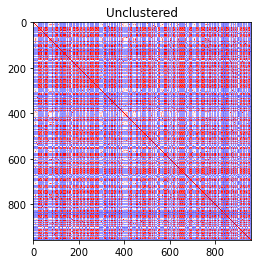

In [17]:
#check similarity matrix
gen_unclustered_similarity_matrix(title="Unclustered",Dsca=[Dsca])

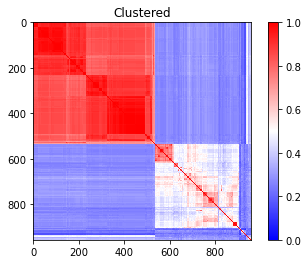

In [18]:
gen_clustered_similarity_matrix(title="Clustered", Dsca=[Dsca])

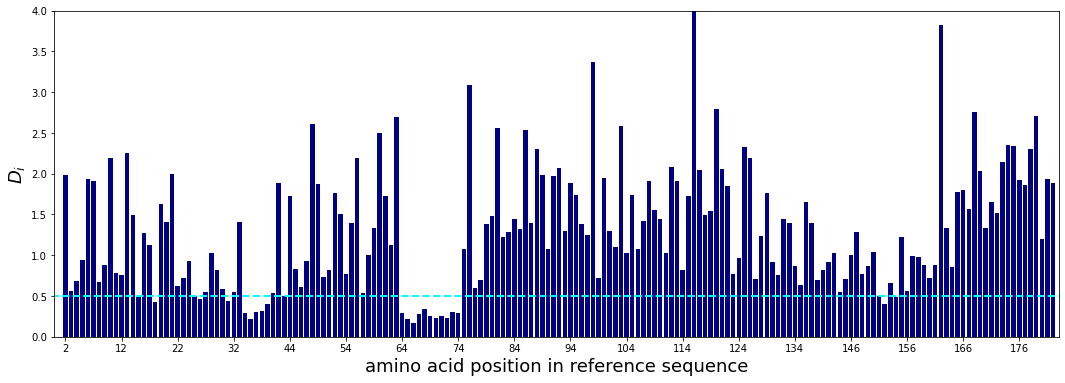

In [19]:
#Visualizing evolutionary conservation
gen_amino_acid_position_in_ref_sequence_graph(
    xlabel='amino acid position in reference sequence', 
    Dsca=[Dsca], 
    Dseq=[Dseq]
)